Nama : Elisabeth Faren Widyaningtyas

NIM  : 4101422103

# 📌**Import Library dan Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

# 📌**Exploratory Data Analysis (EDA)**

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.shape

(891, 12)

In [8]:
#Jumlah total penumpang
total_penumpang = data['PassengerId'].count()
print("Total penumpang:", total_penumpang)

Total penumpang: 891


In [9]:
#Jumlah penumpang selamat dan tidak selamat
tabel_status = data['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'}).reset_index()
tabel_status.columns = ['Status', 'Jumlah']
tabel_status

,Status,Jumlah
0,Tidak Selamat,549
1,Selamat,342


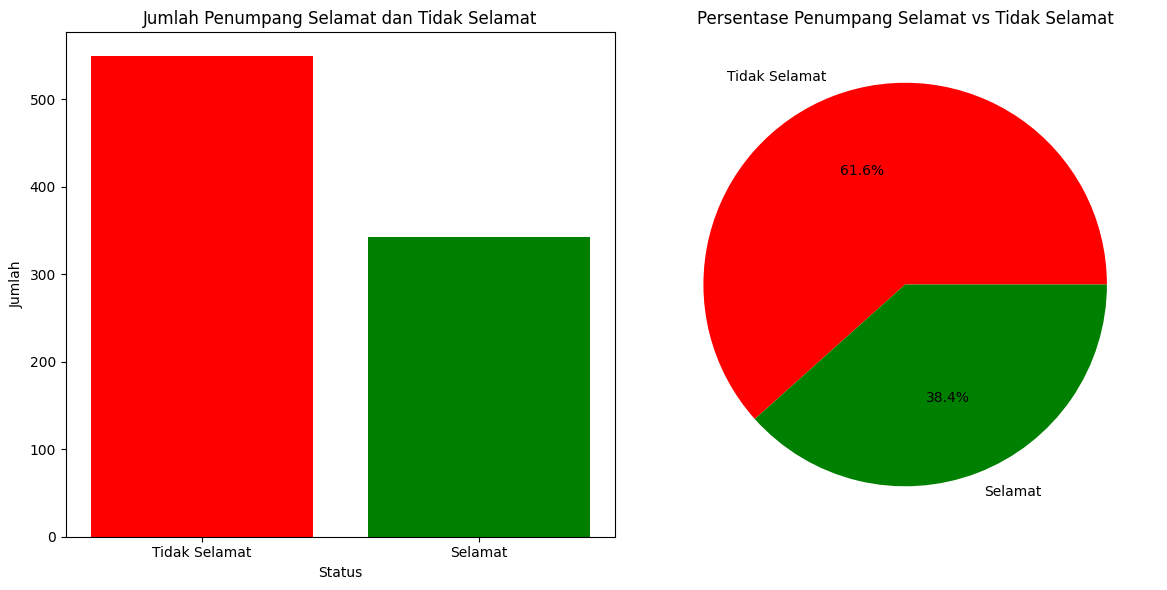

In [10]:
#Grafik jumlah penumpang selamat dan tidak selamat
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
ax1.bar(tabel_status['Status'], tabel_status['Jumlah'], color=['red', 'green'])
ax1.set_title('Jumlah Penumpang Selamat dan Tidak Selamat')
ax1.set_xlabel('Status')
ax1.set_ylabel('Jumlah')

# Pie chart
ax2.pie(tabel_status['Jumlah'], labels=tabel_status['Status'], autopct='%1.1f%%', colors=['red', 'green'])
ax2.set_title('Persentase Penumpang Selamat vs Tidak Selamat')

plt.tight_layout()
plt.show()

In [11]:
#Rata-rata umur Penumpang
rata2_umur = data['Age'].mean()
print("Rata-rata umur penumpang: {:.2f}".format(rata2_umur))

Rata-rata umur penumpang: 29.70


In [12]:
#Penumpang termuda dan tertua
nama_termuda = data.loc[data['Age'].idxmin(), 'Name']
print("Penumpang termuda:", nama_termuda)
nama_tertua = data.loc[data['Age'].idxmax(), 'Name']
print("Penumpang tertua:", nama_tertua)

Penumpang termuda: Thomas, Master. Assad Alexander
Penumpang tertua: Barkworth, Mr. Algernon Henry Wilson


In [13]:
#Jumlah penumpang berdasarkan jenis kelamin
jumlah_jk = data['Sex'].value_counts().reset_index()
jumlah_jk.columns = ['Jenis Kelamin', 'Jumlah']
jumlah_jk

,Jenis Kelamin,Jumlah
0,male,577
1,female,314


In [14]:
#Jenis kelamin terbanyak
lebih_banyak = jumlah_jk.loc[jumlah_jk['Jumlah'].idxmax(), 'Jenis Kelamin']
print(f"Penumpang {lebih_banyak} lebih banyak.")

Penumpang male lebih banyak.


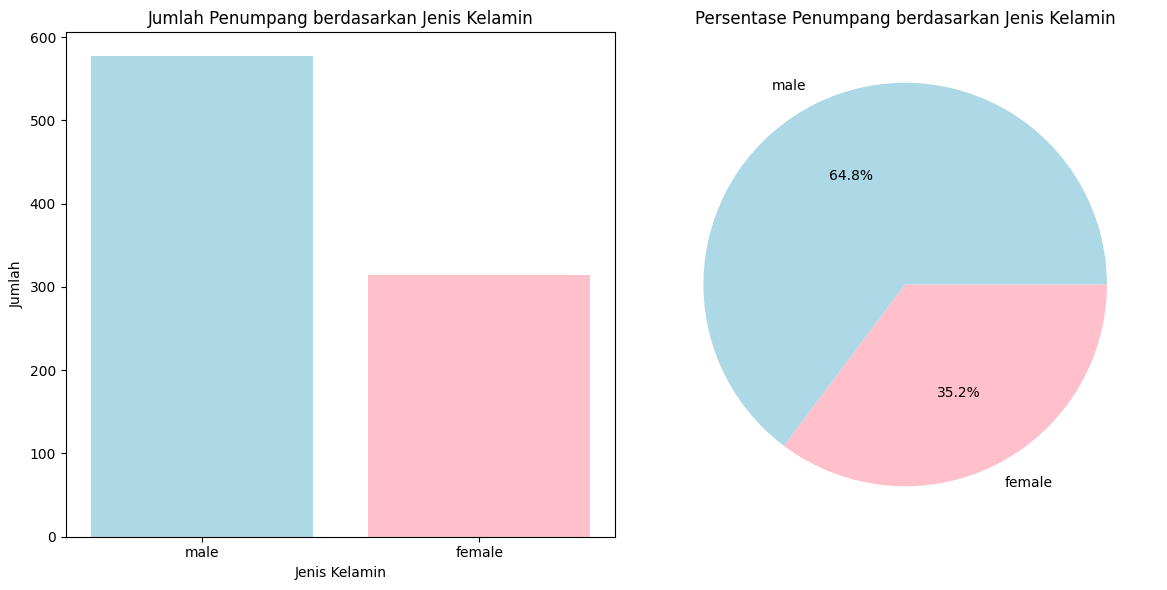

In [15]:
#Visualisasi jenis kelamin
jumlah_jk = data['Sex'].value_counts().reset_index()
jumlah_jk.columns = ['Jenis Kelamin', 'Jumlah']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
ax1.bar(jumlah_jk['Jenis Kelamin'], jumlah_jk['Jumlah'], color=['lightblue', 'pink'])
ax1.set_title('Jumlah Penumpang berdasarkan Jenis Kelamin')
ax1.set_xlabel('Jenis Kelamin')
ax1.set_ylabel('Jumlah')

# Pie chart
ax2.pie(jumlah_jk['Jumlah'], labels=jumlah_jk['Jenis Kelamin'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
ax2.set_title('Persentase Penumpang berdasarkan Jenis Kelamin')

plt.tight_layout()
plt.show()

In [16]:
#Jumlah penumpang berdasarkan kelas
jumlah_kelas = data['Pclass'].value_counts().sort_index().reset_index()
jumlah_kelas.columns = ['Kelas', 'Jumlah']
jumlah_kelas

,Kelas,Jumlah
0,1,216
1,2,184
2,3,491


In [17]:
# Persentase data kelas 1
total_penumpang = data.shape[0]
jumlah_kelas_1 = jumlah_kelas.loc[jumlah_kelas['Kelas'] == 1, 'Jumlah'].values[0]
persentase_kelas_1 = (jumlah_kelas_1 / total_penumpang) * 100

print(f"Jumlah penumpang di kelas 1: {jumlah_kelas_1}")
print(f"Persentase penumpang di kelas 1: {persentase_kelas_1:.2f}%")

Jumlah penumpang di kelas 1: 216
Persentase penumpang di kelas 1: 24.24%


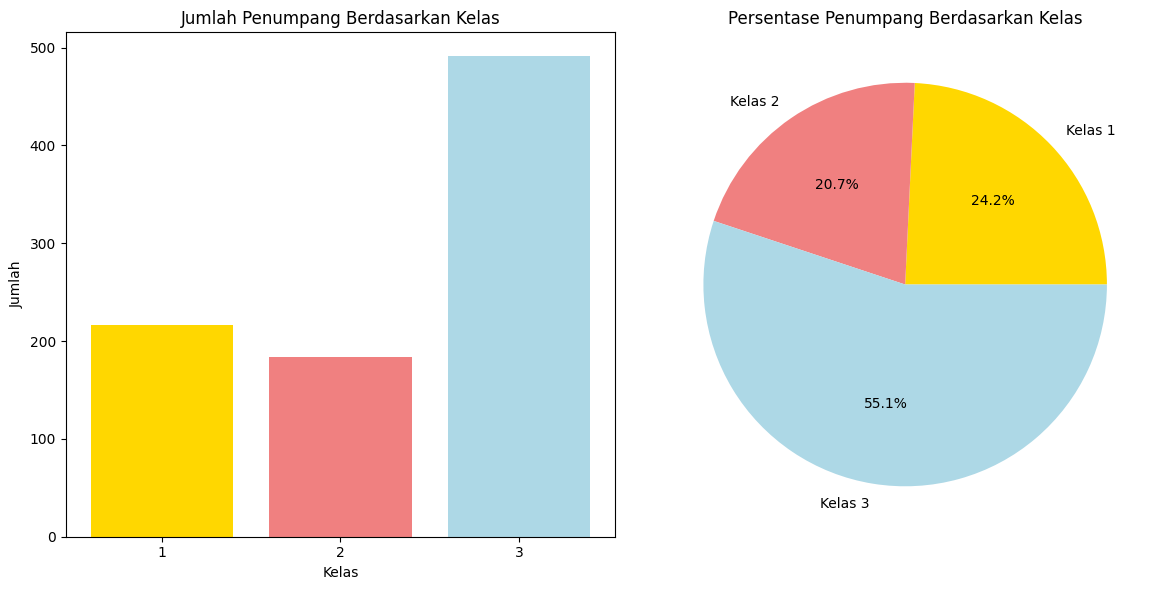

In [18]:
#Visualisasi kelas
plt.figure(figsize=(12,6))

#Bar chart
plt.subplot(1, 2, 1)
plt.bar(jumlah_kelas['Kelas'].astype(str), jumlah_kelas['Jumlah'], color=['gold', 'lightcoral', 'lightblue'])
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

#Pie chart
plt.subplot(1, 2, 2)
plt.pie(jumlah_kelas['Jumlah'], labels=['Kelas ' + str(k) for k in jumlah_kelas['Kelas']], autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightblue'])
plt.title('Persentase Penumpang Berdasarkan Kelas')

plt.tight_layout()
plt.show()

#**📌Preprocessing**

##**🔎Deteksi Missing Value**

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 12 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 891 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris kurang dari 891, ini menunjukkan bahwa terdapat missing value maka akan dilakukan proses identifikasi lebih lanjut.

In [20]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [22]:
#Mengetahui jumlah missing value
data.isnull().sum().sum()

np.int64(866)

Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blank/ N/A(Python : nan atau Nan)) adalah kolom Age, Cabin, dan Embarked. Total missing value sebanyak 866.

##**🛠️Menangani Missing Values**

###**Age**

In [23]:
#Melihat isi dalam kolom Age
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [24]:
#Jumlah missing value Age
np.sum(data['Age'].isnull())

np.int64(177)

Missing value pada kolom Age diisi menggunakan median karena median lebih tahan terhadap outlier dibandingkan mean. Dalam dataset ini, nilai Age memiliki sebaran yang tidak merata (skewed) serta terdapat beberapa nilai ekstrem (sangat kecil atau sangat besar) yang dapat mempengaruhi mean secara signifikan, sehingga membuatnya kurang representatif.

In [25]:
#Mengisi missing value dengan median
data['Age']=data['Age'].fillna(data['Age'].median())

In [26]:
#Melihat isi dalam kolom Age setelah mengisi missing values
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [27]:
#Jumlah missing value harga setelah mengisi missing value
np.sum(data['Age'].isnull())

np.int64(0)

###**Cabin**

In [28]:
#Melihat isi dalam kolom Cabin
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [29]:
#Jumlah missing value Cabin
np.sum(data['Cabin'].isnull())

np.int64(687)

Karena missing value pada cabin hampir 77% maka kolom cabin hapus.

In [30]:
data = data.drop(columns=['Cabin'])

###**Embarked**

In [31]:
#Melihat isi dalam kolom Embarked
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
#Jumlah missing value Embarked
np.sum(data['Embarked'].isnull())

np.int64(2)

Missing value pada kolom Embarked ditangani dengan mengisi menggunakan modus, yaitu nilai yang paling sering muncul, karena kolom ini bertipe kategorikal dan hanya memiliki sedikit data yang hilang. Modus dianggap representatif karena mencerminkan pelabuhan embarkasi terbanyak yang dipilih oleh mayoritas penumpang, sehingga pengisian ini tidak mengubah distribusi data secara signifikan. Selain itu, penggunaan modus mempertahankan konsistensi kategori tanpa memperkenalkan nilai baru, sehingga cocok untuk data dengan frekuensi terbatas seperti Embarked.

In [33]:
mode_val = data['Embarked'].mode()[0]

#Mengisi missing value dengan modus
data['Embarked'] = data['Embarked'].fillna(mode_val)

In [34]:
#Melihat isi dalam kolom Embarked setelah mengisi missing values
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [35]:
#Jumlah missing value Embarked setelah mengisi missing values
np.sum(data['Embarked'].isnull())

np.int64(0)

### **Cek Kembali Kelengkapan Data**

In [36]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Berdasarkan output pengecekan kembali, data telah lengkap dan bebas dari missing values.

##**🔎Deteksi Outlier**

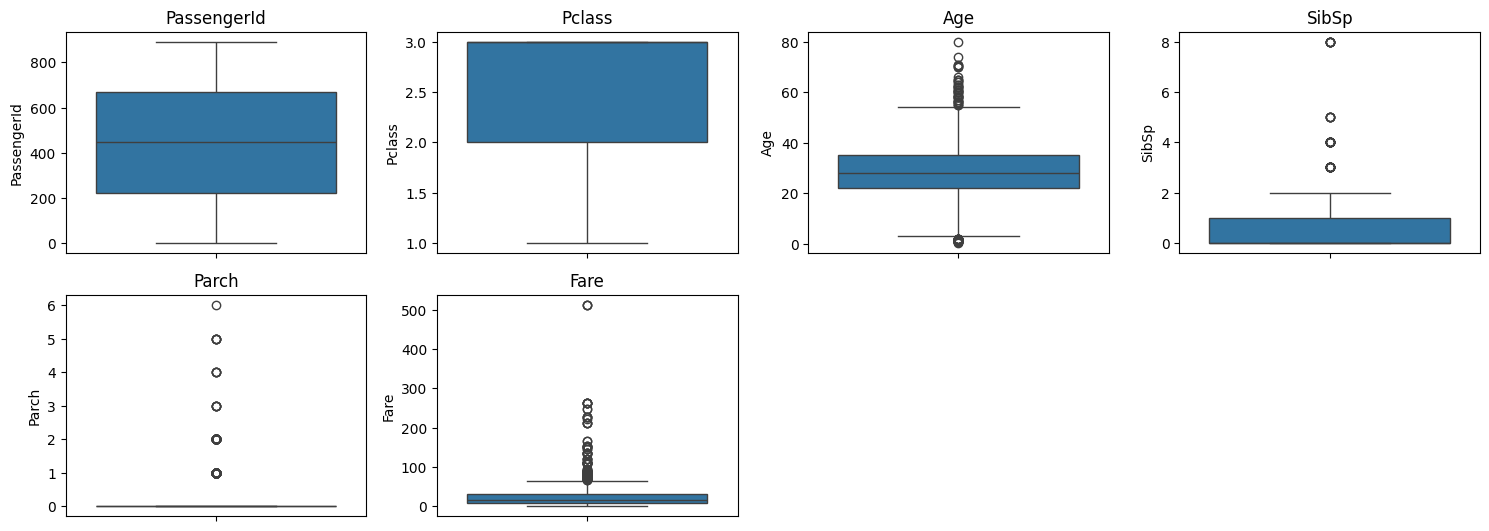

In [38]:
# Kolom numerik yang dicek outliernya
num_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [39]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

PassengerId: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


Berdasarkan hasil cek outlier, terdapat outlier pada data ini. Outlier berada pada kolom Age, SibSp, Parch, dan Fare. **Outlier adalah nilai data yang secara signifikan berbeda dari sebagian besar data lain dalam suatu kumpulan data.** Dalam analisis statistik dan pengolahan data, outlier seringkali terlihat sebagai nilai yang ekstrem, baik terlalu tinggi maupun terlalu rendah, yang berada jauh di luar pola umum distribusi data.

**Outlier pada data ini perlu diatasi** karena dapat menyebabkan bias dalam analisis statistik, mempengaruhi nilai ukuran pemusatan seperti mean, serta menurunkan akurasi dan keandalan model prediksi. Kehadiran outlier juga dapat memperbesar variabilitas data sehingga mengganggu interpretasi hasil analisis. Dengan menangani outlier, data menjadi lebih bersih, model lebih stabil, dan hasil analisis lebih valid. Cara mengatasi adalah dengan metode **Winsorizing** (Mengganti outiler dengan batas IQR). Metode ini karena data penting dan tidak boleh dihapus.



##**🛠️Menangani Outlier**

In [40]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

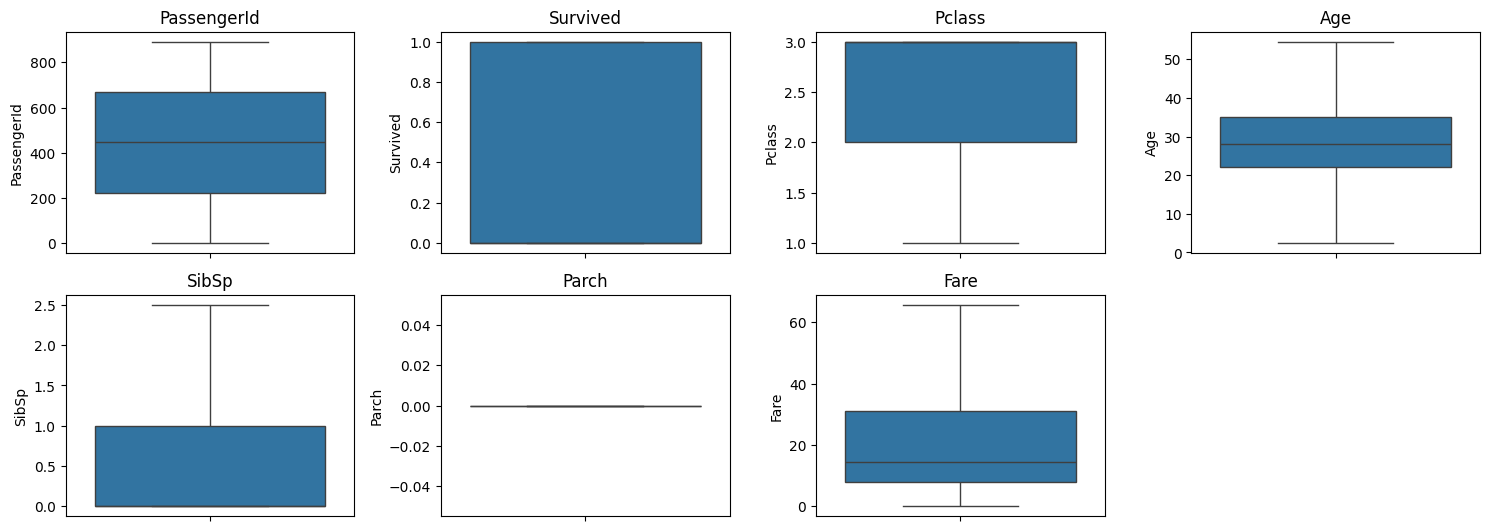

In [41]:
# Kolom numerik yang dicek outliernya
num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [42]:
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 0 outliers
SibSp: 0 outliers
Parch: 0 outliers
Fare: 0 outliers


Setelah dilakukan pengecekan ulang, data sudah bersih dari outlier.

##**🔄Encoding Data**

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1.0,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
1,2.0,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,65.6344,C
2,3.0,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
3,4.0,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S
4,5.0,0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S


In [44]:
data = pd.get_dummies(data, columns=['Sex'], prefix=['Sex'])
data = pd.get_dummies(data, columns=['Embarked'], prefix=['Embarked'])

In [45]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0,3.0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,False,True,False,False,True
1,2.0,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,65.6344,True,False,True,False,False
2,3.0,1,3.0,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4.0,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,True,False,False,False,True
4,5.0,0,3.0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,False,True,False,False,True


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    float64
 6   Parch        891 non-null    float64
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    bool   
 10  Sex_male     891 non-null    bool   
 11  Embarked_C   891 non-null    bool   
 12  Embarked_Q   891 non-null    bool   
 13  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(6), int64(1), object(2)
memory usage: 67.1+ KB


##**📏Transformasi/Standarisasi/Scalling**

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
data[num_cols] = scaler.fit_transform(data[num_cols])

In [48]:
# Drop kolom yang tidak diperlukan
data.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis=1, inplace=True)

#**📌Modelling**

In [49]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3.0,-0.583432,0.810220,0.0,False,True,False,False,True
1,1,1.0,0.742685,0.810220,0.0,True,False,True,False,False
2,1,3.0,-0.251903,-0.602512,0.0,True,False,False,False,True
3,1,1.0,0.494038,0.810220,0.0,True,False,False,False,True
4,0,3.0,0.494038,-0.602512,0.0,False,True,False,False,True


Setiap baris dalam dataset mewakili satu penumpang, dan kolom-kolomnya adalah atribut-atribut yang diamati pada penumpang-penumpang tersebut. Berikut adalah penjelasan dari setiap variabelnya:

PassengerId : Nomor urut penumpang

Pclass : Tingkat kelas

Age : Umur penumpang

SibSp : Jumlah saudara kandung

Parch : Jumlah orang tua atau anak yang ikut

Ticket : Nomor tiket

Fare : Harga tiket

Cabin : Nomor kabin

Sex : Jenis kelamin

Embarked : Pelabuhan naik kapal

Survived: Variabel target atau label yang menunjukkan kemungkinan penumpang selamat atau tidak selamat.

##**Pembagian Data Training dan Testing**

In [50]:
#Memisahkan data menjadi variabel x dan y
x=data.drop(['Survived'], axis=1)
y=data['Survived']

Pembagian data menjadi training set dan testing set merupakan langkah yang sangat penting. Pembagian ini dilakukan untuk memastikan bahwa model yang dibangun dapat memprediksi hasil dengan akurat pada data yang belum pernah dilihat sebelumnya, seperti memprediksi apakah seorang penumpang Titanic selamat atau tidak selamat.

1. Proses Pembagian Data

•	Pengumpulan Data:
Data Titanic berisi informasi mengenai penumpang kapal Titanic, termasuk kolom-kolom seperti Pclass (kelas penumpang), Sex (jenis kelamin), Age (usia), SibSp (jumlah saudara/istri di kapal), Fare (tarif tiket), dan Survived (apakah penumpang selamat atau tidak).

•	Pembagian Data:

* Training Set: Sekitar 70-80% dari total data digunakan untuk melatih model. Dalam training set, fitur-fitur seperti Pclass, Sex, Age, dan lainnya digunakan oleh model untuk mempelajari pola hubungan antara data input dan hasil yang ingin diprediksi (yaitu apakah penumpang selamat atau tidak).

* Testing Set: Sisa data, sekitar 20-30%, digunakan sebagai data testing. Data ini tidak digunakan dalam proses pelatihan dan digunakan untuk menguji kemampuan model dalam memprediksi kelangsungan hidup penumpang yang tidak ada dalam data pelatihan.

•	Validasi (Opsional): Beberapa metode, seperti cross-validation, dapat digunakan untuk membagi data menjadi beberapa subset. Hal ini digunakan untuk mengevaluasi model secara lebih robust, dengan memastikan model diuji pada beberapa bagian data yang berbeda.

2. Alasan Mengapa Pembagian Data Diperlukan
*   Menghindari Overfitting: Jika data yang digunakan untuk melatih model juga digunakan untuk pengujian, model dapat menghafal data tersebut (overfitting) dan tidak bisa bekerja dengan baik pada data baru. Pembagian data yang tepat membantu menghindari hal ini.
* Menilai Kinerja Model: Pembagian data menjadi training dan testing set memungkinkan kita untuk mengukur kinerja model pada data yang tidak terlibat dalam pelatihan. Dengan demikian, kita dapat menilai sejauh mana model dapat menggeneralisasi pola yang ditemukan pada data baru, yang lebih mirip dengan data dunia nyata.
* Mengoptimalkan Model: Pembagian yang jelas antara training set dan testing set memungkinkan kita untuk mengevaluasi model secara objektif dan melakukan penyempurnaan model, misalnya dengan memilih hyperparameter yang lebih baik atau mencoba algoritma lain.
* Validasi Hasil yang Konsisten: Dengan menggunakan data testing yang terpisah, kita bisa memvalidasi apakah hasil yang diperoleh benar-benar mencerminkan kemampuan model dalam memprediksi data yang baru dan tidak terlihat sebelumnya.



In [51]:
#Pembagian data training dan testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Proporsi pembagian data adalah:**

80% untuk training set (untuk melatih model)

20% untuk testing set (untuk menguji kinerja model)

**Alasan**

Pembagian 80% untuk training set dan 20% untuk testing set memberikan keseimbangan yang optimal antara jumlah data yang digunakan untuk melatih model dan data yang digunakan untuk menguji kinerjanya. Penggunaan 80% data untuk pelatihan, model memiliki cukup data untuk mempelajari pola yang ada dan memahami hubungan antara fitur dan target. Nantinya memungkinkan model untuk belajar memprediksi kelangsungan hidup penumpang berdasarkan berbagai fitur-fitur, seperti usia, kelas, atau jenis kelamin.

Pembagian ini juga menghindari masalah overfitting, dimana pembagian data yang terlalu banyak digunakan untuk testing, seperti 50% atau lebih, mengurangi jumlah data yang dapat digunakan untuk pelatihan, yang berdampak pada kemampuan model untuk mempelajari pola dengan baik. Sebaliknya, jika terlalu banyak data digunakan untuk training (misalnya 90%), data testing yang terlalu sedikit tidak dapat memberikan evaluasi model yang memadai. Pembagian data dengan rasio 80:20 membantu menghindari overfitting, di mana model menghafal data pelatihan tanpa bisa menggeneralisasi dengan baik pada data yang tidak terlihat sebelumnya.


In [52]:
# Scaling data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##**Model Klasifikasi**

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [54]:
#Decision Tree
dt = DecisionTreeClassifier(random_state=30)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

Decision Tree adalah algoritma yang membuat model prediksi berbentuk seperti pohon. Setiap simpul (node) dalam pohon mewakili sebuah fitur (atribut), setiap cabang mewakili keputusan berdasarkan fitur tersebut, dan setiap daun (leaf) mewakili hasil atau kelas akhir.

Cara kerja:
Memilih fitur terbaik untuk membagi data, membuat percabangan sampai data terbagi homogen, lalu prediksi mengikuti jalur dari akar ke daun.

In [55]:
#Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

Naive Bayes adalah algoritma klasifikasi berbasis teori probabilitas Bayes, dengan asumsi bahwa setiap fitur adalah independen satu sama lain terhadap kelas.

Cara kerja:
Menghitung peluang setiap kelas berdasarkan fitur, lalu memilih kelas dengan probabilitas tertinggi untuk prediksi.

In [56]:
#K-Neares Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

K-Nearest Neighbors (KNN) adalah algoritma klasifikasi berbasis jarak yang sederhana namun efektif. Tidak ada proses pelatihan eksplisit ("lazy learning").

Cara kerja:
Mengukur jarak data baru ke semua data training, memilih k data terdekat, lalu voting untuk menentukan kelas prediksi.

###**Nilai Evaluasi**

In [57]:
#Decision Tree
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.75      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179

Accuracy: 0.7877094972067039


Dari hasil classification report, kita bisa lihat:

* Precision untuk kelas 0 (tidak selamat) adalah 0.81, untuk kelas 1 (selamat) adalah 0.75.
* Recall untuk kelas 0 adalah 0.86, dan untuk kelas 1 adalah 0.67.
* F1-Score untuk kelas 0 adalah 0,83, dan untuk kelas 1 adalah 0,71.
* Akurasi keseluruhan: 78%.

In [58]:
#Naive Bayes
print("\nNaive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       110
           1       0.71      0.80      0.75        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.80      0.79      0.80       179

Accuracy: 0.7932960893854749


Dari hasil classification report, kita bisa lihat:

* Precision untuk kelas 0 (tidak selamat) adalah 0.86, untuk kelas 1 (selamat) adalah 0.71.
* Recall untuk kelas 0 adalah 0.79, dan untuk kelas 1 adalah 0.80.
* F1-Score untuk kelas 0 adalah 0,82, dan untuk kelas 1 adalah 0,75.
* Akurasi keseluruhan: 79%.

In [59]:
#K-Neares Neighbors
print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       110
           1       0.86      0.74      0.80        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179

Accuracy: 0.8547486033519553


Dari hasil classification report, kita bisa lihat:

* Precision untuk kelas 0 (tidak selamat) adalah 0.85, untuk kelas 1 (selamat) adalah 0.86.
* Recall untuk kelas 0 adalah 0.93, dan untuk kelas 1 adalah 0.74.
* F1-Score untuk kelas 0 adalah 0,89, dan untuk kelas 1 adalah 0,80.
* Akurasi keseluruhan: 85%.

**Perbandingan Ketiga Alogaritma**

K-Nearest Neighbors memberikan performa yang paling bagus sebesar 85% karena mampu menangkap pola sederhana antar fitur seperti umur, jenis kelamin, dan kelas tiket. Titanic memiliki pola yang cukup terpisah antar kelas penumpang, sehingga KNN efektif memprediksi dengan hanya mengandalkan jarak antar data tanpa perlu asumsi rumit.

#**📌Evaluasi**

**Nilai Precision dan Recall**

In [60]:
report = classification_report(y_test, y_pred_dt, output_dict=True)
precision_1 = report['1']['precision']
recall_1 = report['1']['recall']
print(f"\nPrecision untuk prediksi selamat: {precision_1:.2f}")
print(f"Recall untuk prediksi selamat: {recall_1:.2f}")

cm = confusion_matrix(y_test, y_pred_dt)
predicted_survived = cm[1][0] + cm[1][1]
true_survived = cm[1][1]
print(f"\nJumlah prediksi selamat: {predicted_survived}")
print(f"Jumlah prediksi selamat yang benar: {true_survived}")


Precision untuk prediksi selamat: 0.75
Recall untuk prediksi selamat: 0.67

Jumlah prediksi selamat: 69
Jumlah prediksi selamat yang benar: 46


Precision sebesar 0,75 berarti dari semua prediksi selamat hanya 75% yang benar-benar selamat. Recall sebesar 67% berarti model dapat mengidentifikasi 67% dari semua penumpang kapal titanic yang benar-benar selamat. Dari 69 prediksi yang selamat, 46 diantaranya benar-benar selamat.